In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data =pd.read_csv('clean_data.csv')

In [4]:
X = data.drop("placement_status", axis=1)
y = data["placement_status"]


In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.15, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.176, random_state=42, stratify=y_temp)  # Approx 15/85 split
print("Train shape:", X_train.shape)
print("Val shape:", X_val.shape)
print("Test shape:", X_test.shape)

Train shape: (2813, 168)
Val shape: (602, 168)
Test shape: (603, 168)


In [16]:
importances = best_rf.feature_importances_
feature_names = X_train.columns

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(importance_df)


                                 Feature  Importance
136              placement_country_India    0.061651
141     placement_country_United Kingdom    0.061245
137            placement_country_Ireland    0.060453
135            placement_country_Germany    0.060018
138             placement_country_Russia    0.058257
..                                   ...         ...
93   university_name_Stanford University    0.000100
91           university_name_RWTH Aachen    0.000098
37                destination_city_Espoo    0.000091
72   university_name_Columbia University    0.000073
79             university_name_IIT Delhi    0.000055

[168 rows x 2 columns]


In [7]:
from sklearn.ensemble import RandomForestClassifier

best_rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=20,
    min_samples_split=2,
    random_state=42
)

best_rf.fit(X_train, y_train)


,n_estimators,300
,criterion,'gini'
,max_depth,20
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [8]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = best_rf.predict(X_test)

print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Test Accuracy: 0.9983416252072969

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       301
           1       1.00      1.00      1.00       302

    accuracy                           1.00       603
   macro avg       1.00      1.00      1.00       603
weighted avg       1.00      1.00      1.00       603



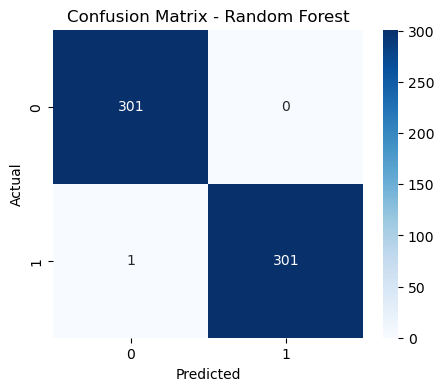

In [9]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


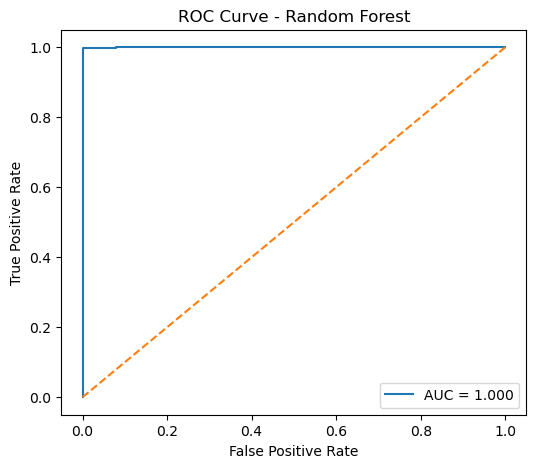

In [10]:
from sklearn.metrics import roc_curve, auc

y_prob = best_rf.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend()
plt.show()


In [11]:
importances = best_rf.feature_importances_
feature_names = X_train.columns

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(importance_df)


                                 Feature  Importance
136              placement_country_India    0.061651
141     placement_country_United Kingdom    0.061245
137            placement_country_Ireland    0.060453
135            placement_country_Germany    0.060018
138             placement_country_Russia    0.058257
..                                   ...         ...
93   university_name_Stanford University    0.000100
91           university_name_RWTH Aachen    0.000098
37                destination_city_Espoo    0.000091
72   university_name_Columbia University    0.000073
79             university_name_IIT Delhi    0.000055

[168 rows x 2 columns]


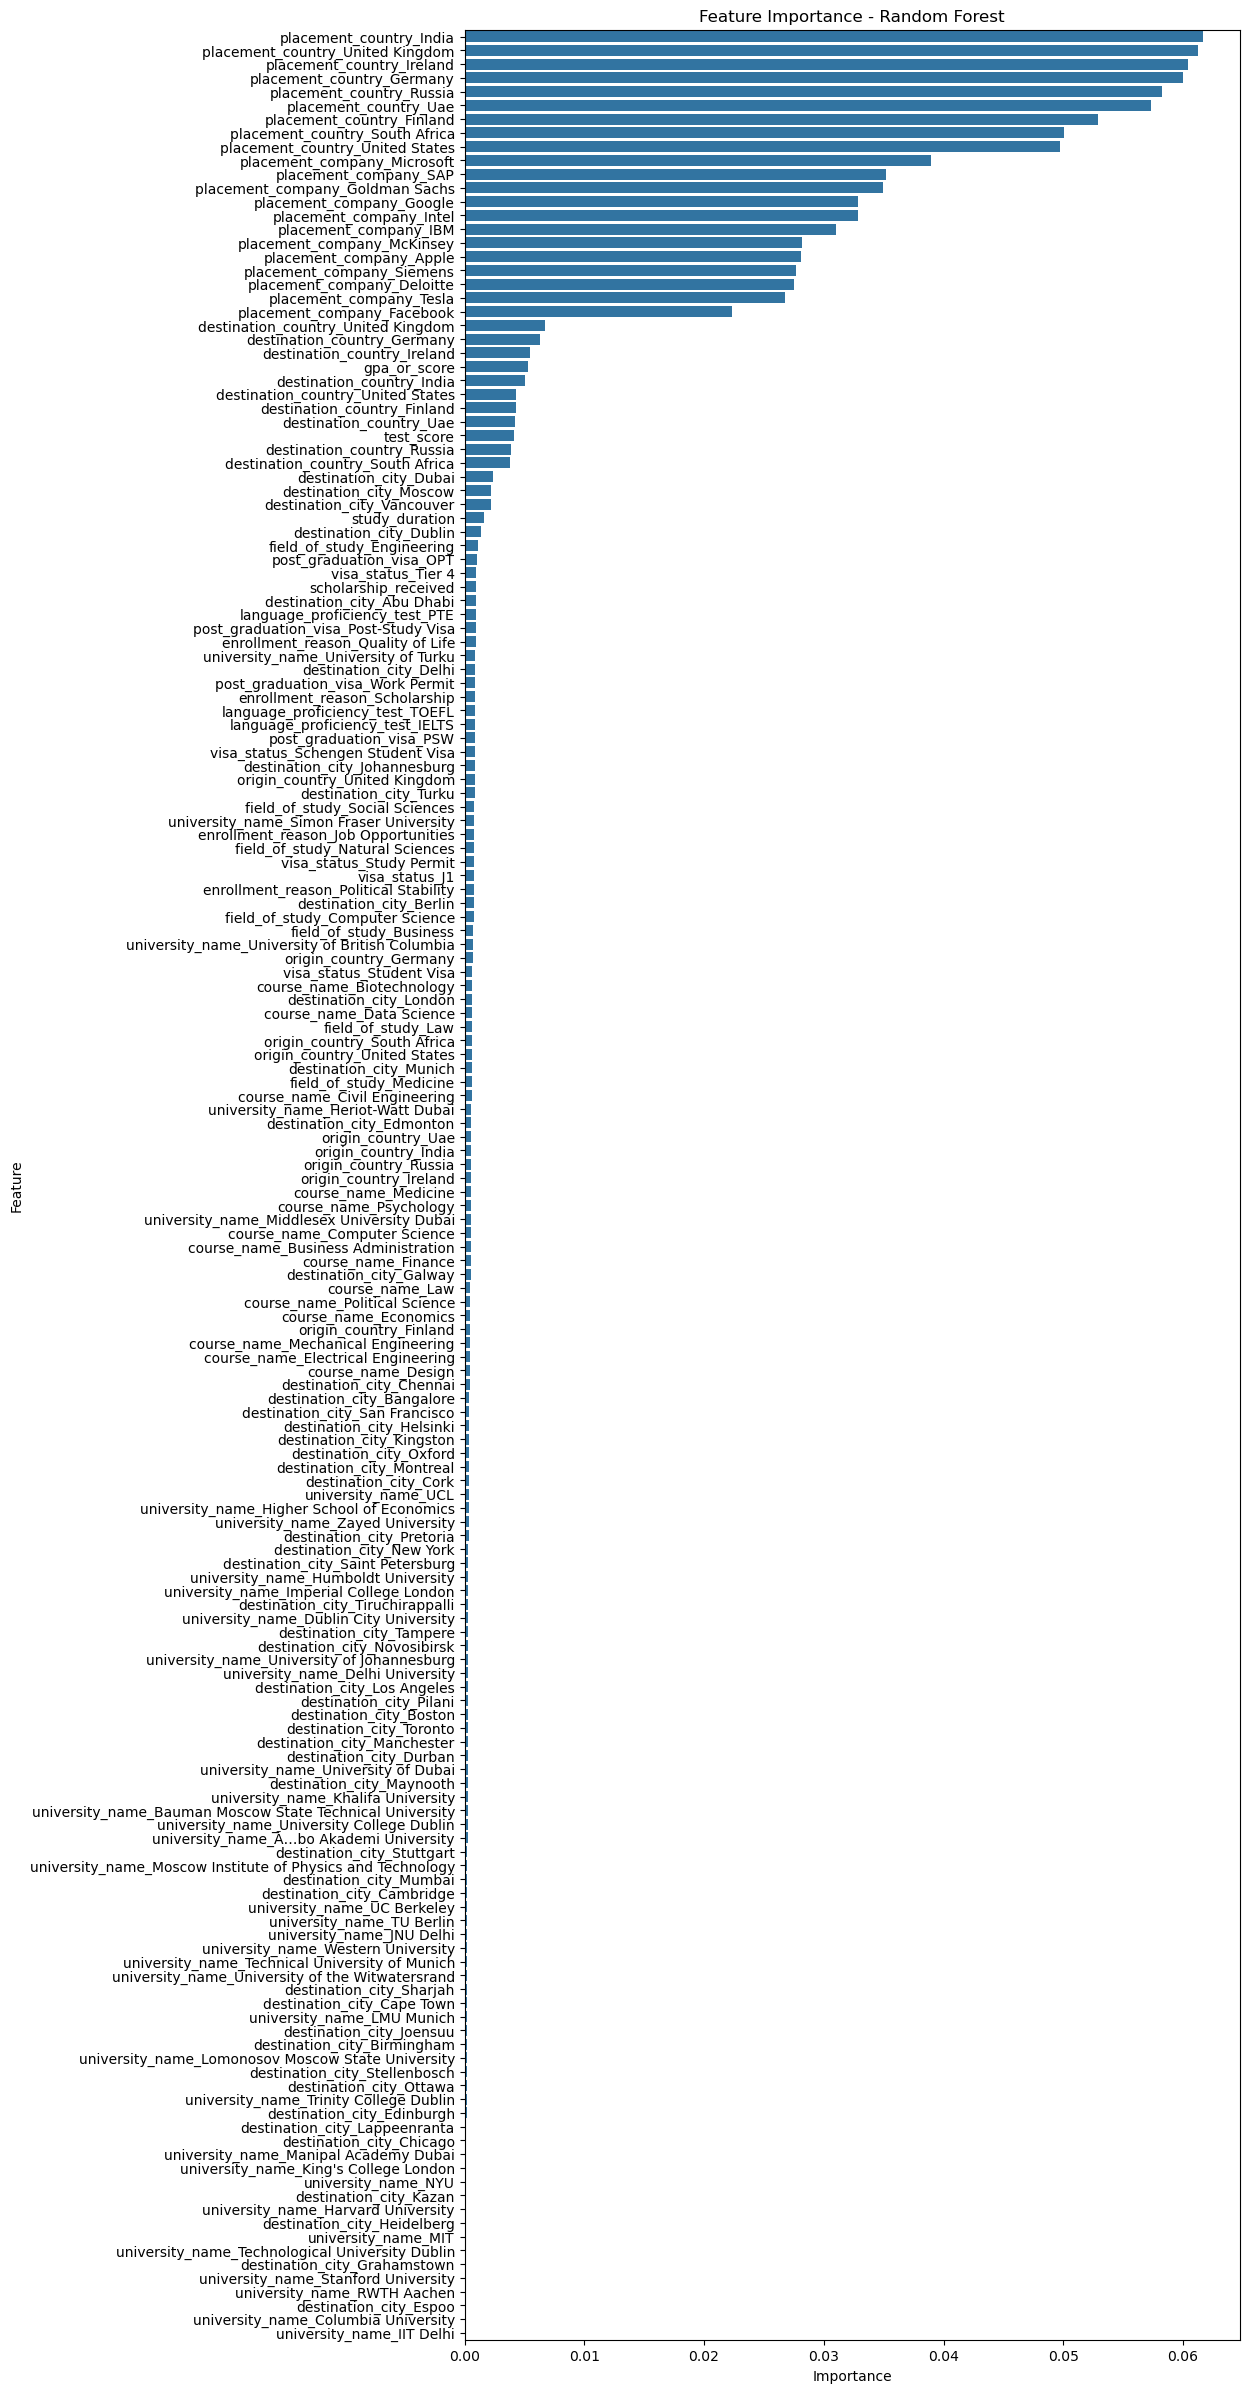

In [15]:
plt.figure(figsize=(10,30))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title("Feature Importance - Random Forest")
plt.show()


In [17]:
low_importance_features = importance_df[
    importance_df['Importance'] < 0.01
]['Feature'].tolist()

print("Features to remove:", low_importance_features)


Features to remove: ['destination_country_United Kingdom', 'destination_country_Germany', 'destination_country_Ireland', 'gpa_or_score', 'destination_country_India', 'destination_country_United States', 'destination_country_Finland', 'destination_country_Uae', 'test_score', 'destination_country_Russia', 'destination_country_South Africa', 'destination_city_Dubai', 'destination_city_Moscow', 'destination_city_Vancouver', 'study_duration', 'destination_city_Dublin', 'field_of_study_Engineering', 'post_graduation_visa_OPT', 'visa_status_Tier 4', 'scholarship_received', 'destination_city_Abu Dhabi', 'language_proficiency_test_PTE', 'post_graduation_visa_Post-Study Visa', 'enrollment_reason_Quality of Life', 'university_name_University of Turku', 'destination_city_Delhi', 'post_graduation_visa_Work Permit', 'enrollment_reason_Scholarship', 'language_proficiency_test_TOEFL', 'language_proficiency_test_IELTS', 'post_graduation_visa_PSW', 'visa_status_Schengen Student Visa', 'destination_city_

In [18]:
X_train_reduced = X_train.drop(columns=low_importance_features)
X_test_reduced = X_test.drop(columns=low_importance_features)


In [19]:
rf_reduced = RandomForestClassifier(
    n_estimators=300,
    max_depth=20,
    min_samples_split=2,
    random_state=42
)

rf_reduced.fit(X_train_reduced, y_train)


,n_estimators,300
,criterion,'gini'
,max_depth,20
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [20]:
from sklearn.metrics import accuracy_score, classification_report

y_pred_reduced = rf_reduced.predict(X_test_reduced)

print("Reduced Feature Model Accuracy:",
      accuracy_score(y_test, y_pred_reduced))

print(classification_report(y_test, y_pred_reduced))


Reduced Feature Model Accuracy: 0.9983416252072969
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       301
           1       1.00      1.00      1.00       302

    accuracy                           1.00       603
   macro avg       1.00      1.00      1.00       603
weighted avg       1.00      1.00      1.00       603



In [21]:
import joblib
joblib.dump(best_rf, "final_random_forest_model.pkl")
print("Model saved as final_random_forest_model.pkl")


Model saved as final_random_forest_model.pkl
